In [1]:
import pandas as pd
import DataLoading
import torch
import matplotlib.pyplot as plt
import NN_evaluation
import numpy as np 

In [2]:
sc = "sc01"
period = "2030"
case= "3-bus"
folder = f"../Data/{case}_AC_12w_ext_o_dummy_LCOE/"
folder = f"../Data/{case}_DC_fy/"

all_executions = DataLoading.list_executions(folder=folder,per = period,sc=sc)
te_s = 0.3
val_s = 0.4
dfs_in, dfs_out, dfs_inter = DataLoading.load_data_ext_out(folder, all_executions, period, sc, ["PowerFlow"],"SystemCosts")
dfs_inter_j = DataLoading.join_frames_inter_layer(dfs_inter)
dfs_inter_j = DataLoading.trim_columns_to_common(dfs_inter_j)
# Convert to pytorch tensors
ts_in, ts_out, ts_inter = DataLoading.split_tr_val_te_ext_out(dfs_in, dfs_out, dfs_inter_j, all_executions, te_s, val_s)
d_ft_in, d_ft_out, d_ft_inter,maxs = DataLoading.concat_and_normalize_ext_out(ts_in, ts_out, ts_inter, all_executions)

input_size = dfs_in["Network_Existing_Generation_Full"].shape[1]
inter_size = dfs_inter_j["Network_Existing_Generation_Full"].shape[1]

input_f_sc01_Network_Existing_Generation_Full_2030.csv
14
input_f_sc01_Network_Full_Generation_Full_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_2_cac1_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_2_cac2_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_2_cac3_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_3_cac1_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_3_cac2_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_3_cac3_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac1_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac2_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac3_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_Node_2_cac1_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_Node_2_cac2_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_Node_2_cac3_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_Node_3_cac1_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_No

TypeError: join_frames_inter_layer() missing 1 required positional argument: 'executions'

In [18]:
ex_P,ex_T

('PINT_Network_Line_In_Node_1_Node_2_cac1',
 'TOOT_Network_Line_In_Node_1_Node_2_cac1')

In [28]:
#Calculate the average output deviation
ex_P = all_executions[1]
ex_T = all_executions[11]

existing_actual = NN_evaluation.get_actual_from_dfs_out(all_executions[0],dfs_out)
ex_actual_P = NN_evaluation.get_actual_from_dfs_out(ex_P,dfs_out)

full_actual = NN_evaluation.get_actual_from_dfs_out(all_executions[1],dfs_out)
ex_actual_T = NN_evaluation.get_actual_from_dfs_out(ex_T,dfs_out)

percentage_dev = (base_actual/ex_actual - 1)*100
percentage_dev_2 = (base_actual - ex_actual)/np.mean(ex_actual)

lb_P = existing_actual - ex_actual_P
lb_T = ex_actual_T - full_actual

lb = (lb_P + lb_T)/2

In [29]:
lb_P.sum(),lb_T.sum(),lb.sum()

(7.937925271848566, 3.129194277827485e-12, 3.9689626359258474)

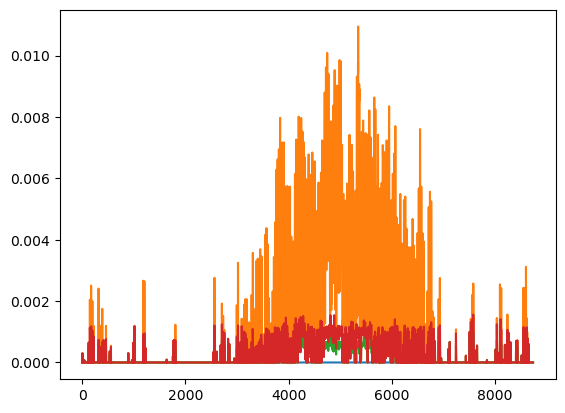

In [6]:
for ex in all_executions[0:4]:
    #ex = all_executions[30]

    base_actual = NN_evaluation.get_actual_from_dfs_out(all_executions[0],dfs_out)
    ex_actual = NN_evaluation.get_actual_from_dfs_out(ex,dfs_out)

    lb = base_actual - ex_actual

    plt.plot(lb)
#plt.plot(base_actual)


In [30]:
np.std(base_actual)/np.mean(base_actual)

0.522968902059392

In [31]:
np.median(percentage_dev),np.mean(percentage_dev)

(5.639932965095795e-12, 3.370884200221452)

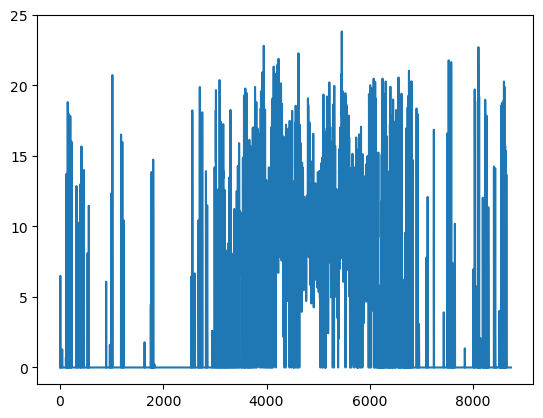

In [32]:
plt.plot(percentage_dev)

In [7]:
dfs_out

{'Network_Existing_Generation_Full':                            vTotalCCost  vTotalECost  vTotalGCost  vTotalRCost
 LoadLevel                                                                    
 2030-01-01T00:00:00+01:00          0.0          0.0     0.016447          0.0
 2030-01-01T01:00:00+01:00          0.0          0.0     0.016715          0.0
 2030-01-01T02:00:00+01:00          0.0          0.0     0.016938          0.0
 2030-01-01T03:00:00+01:00          0.0          0.0     0.017257          0.0
 2030-01-01T04:00:00+01:00          0.0          0.0     0.018526          0.0
 ...                                ...          ...          ...          ...
 2030-12-09T19:00:00+01:00          0.0          0.0     0.023676          0.0
 2030-12-09T20:00:00+01:00          0.0          0.0     0.023204          0.0
 2030-12-09T21:00:00+01:00          0.0          0.0     0.021947          0.0
 2030-12-09T22:00:00+01:00          0.0          0.0     0.020613          0.0
 2030-12-09T23:0